In [2]:
import pandas as pd
import numpy as np

In [5]:
base_path = '/mnt/d/Dataset/2017movies/'

df_info = pd.read_csv(base_path+'2017年电影信息.csv',encoding = "gbk")

# 说明
因变量 电影票房 boxoffice_tot  
[x]类型 
[x]时长 
[x]上映档期  贺岁档、暑期档、 黄金 1 档、黄金 2 档、普通档 
宣发方 
是否改编 
是否真实 
是否翻拍 
是否续集 

导演年代 
导演的第几部作品 
导演是否得奖 
导演是否转型 
演员百度指数 1 
演员百度指数 2 

In [3]:
df_info = df_info[['_id','mname','tag','mlength','releaseday','isSequel','type','region','distributor','boxoffice_tot']]

# 处理Tag
每个电影固定五个`tag`标签数据

In [4]:
# 处理Tag
tags = []
for ts in df_info.tag.tolist():
    tags.extend(eval(ts))

# Tag_id对应
dict_tag = dict(zip(set(tags),range(1,len(tags))))

# 固定五个tag
TAG_NUM = 5 
tag_matrix = []
for ts in df_info.tag.tolist():
    l = eval(ts)
    t = [0]*TAG_NUM
    for i in range(len(l)):
        t[i] = dict_tag[l[i]]
    tag_matrix.append(t)

df_tag = pd.DataFrame(tag_matrix, columns=['tag1','tag2','tag3','tag4','tag5'])
df_tag.head()

,tag1,tag2,tag3,tag4,tag5
0,35,19,37,0,0
1,19,31,37,0,0
2,31,40,0,0,0
3,5,17,23,37,0
4,1,30,29,33,0


# 处理电影类型
三种类型数据使用one-hot形式表示

In [5]:
df_info.type
dict_type = dict(zip(["3D","IMAX","2D"], range(3)))

type_matrix = []
for ts in df_info.type.tolist():
    l = eval(ts)
    t = [0]*3
    for i in range(len(l)):
        t[dict_type[l[i]]] = 1
    type_matrix.append(t)

df_type = pd.DataFrame(type_matrix, columns=['type1','type2','type3'])
df_type.head()

,type1,type2,type3
0,1,1,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


# 处理region


In [6]:
df_info.region
regions = []
for rs in df_info.region.tolist():
    regions.extend(rs.split('/'))

dict_regions = dict(zip(set(sorted(regions)),range(0,len(regions))))

region_matrix = []
for rs in df_info.region.tolist():
    l = rs.split('/')
    t = [0]*22
    for i in range(len(l)):
        t[dict_regions[l[i]]] = 1
    region_matrix.append(t)

df_region = pd.DataFrame(region_matrix, columns=['region'+str(i) for i in range(22)])
df_region.head()

,region0,region1,region2,region3,region4,region5,region6,region7,region8,region9,...,region12,region13,region14,region15,region16,region17,region18,region19,region20,region21
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 处理distributor

In [7]:
df_info.distributor
distributor = []
for ds in df_info.distributor.tolist():
    distributor.extend(eval(ds))

dict_distributor = dict(zip(set(sorted(distributor)),range(0,len(distributor))))

distributor_matrix = []
for ds in df_info.distributor.tolist():
    l = eval(ds)
    t = [0]*3
    for i in range(len(l)):
        t[i] = dict_distributor[l[i]]
    distributor_matrix.append(t)

df_distributor = pd.DataFrame(distributor_matrix, columns=['distributor'+str(i) for i in range(3)])
df_distributor.head()

,distributor0,distributor1,distributor2
0,49,161,0
1,161,0,0
2,96,0,0
3,19,0,0
4,49,22,0


# 处理票房

In [318]:
boxoffice_tot = np.array(df_info.boxoffice_tot.tolist())/1000000
print(len(boxoffice_tot))

270


# 电影上映时间类型


In [9]:
times = pd.to_datetime(df_info.releaseday)
dict_time = dict(zip([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], (5,5,1,2,1,1,2,4,1,3,1,2)))
time_series = []
for time in times:
    time_series.append(dict_time[time.month])

df_time = pd.DataFrame(time_series, columns=['timetype'])

# 2017年电影导演、演员百度指数

In [275]:
df_staff = pd.read_csv(base_path+'2017年电影导演、演员百度指数.csv',encoding = "gbk")

actors = []
for actor in df_staff.actors.tolist():
    actors.extend(actor.split(','))

dict_actor = dict(zip(actors, range(1,len(actors)+1)))

actor_matrix = []
for actor in df_staff.actors.tolist():
    l = actor.split(',')
    t = [0] * 5
    for i in range(len(l)):
        t[i] = dict_actor[l[i]]
    actor_matrix.append(t)

df_actor = pd.DataFrame(actor_matrix, columns=['actor'+str(i) for i in range(5)])
print(df_actor.head())

actor_index_matrix = []
for line in df_staff.actor_index.tolist():
    tmp = line.split()
    if tmp:
        if len(tmp) < 5: tmp.extend([0]*(5-len(tmp)))
        actor_index_matrix.append([int(val) for val in tmp])
    else:
        actor_index_matrix.append([0]*5)
df_actor_index = pd.DataFrame(actor_index_matrix, columns=['actor_index'+str(i) for i in range(5)])
df_actor_index.head()

   actor0  actor1  actor2  actor3  actor4
0       1       2       3       4       5
1       6    1097       8       9      10
2      11     237      13      14     192
3      16      17      18      19      20
4      21      22      23      24      25


,actor_index0,actor_index1,actor_index2,actor_index3,actor_index4
0,1822,511,0,0,0
1,142,6527,176,601,0
2,0,0,0,177,0
3,47905,246,144,0,0
4,23014,5396,2559,2850,16788


# 数据整合

In [339]:
# df = pd.concat([df_info.mname, df_tag, df_type, df_distributor, df_region, df_time],axis=1, sort=False)
df = pd.concat([df_info.mname, df_type, df_region, df_time],axis=1, sort=False)

df2 = pd.concat([df_staff.mname, df_actor, df_actor_index], axis=1, sort = False)
df2.head()
df = pd.merge(df, df2, how='left', on=['mname'])

df['boxoffice_tot'] = boxoffice_tot
df = df.drop(['mname'], axis=1)

df = df[df.boxoffice_tot < 800]
df = df[df.boxoffice_tot > 10]

# 进行分类
cates = []
for b in df.boxoffice_tot.tolist():
    if b < 100 : cates.append(0)
    elif b: cates.append(1)
df['boxoffice_tot'] = cates
        
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186 entries, 0 to 265
Data columns (total 37 columns):
type1            186 non-null int64
type2            186 non-null int64
type3            186 non-null int64
region0          186 non-null int64
region1          186 non-null int64
region2          186 non-null int64
region3          186 non-null int64
region4          186 non-null int64
region5          186 non-null int64
region6          186 non-null int64
region7          186 non-null int64
region8          186 non-null int64
region9          186 non-null int64
region10         186 non-null int64
region11         186 non-null int64
region12         186 non-null int64
region13         186 non-null int64
region14         186 non-null int64
region15         186 non-null int64
region16         186 non-null int64
region17         186 non-null int64
region18         186 non-null int64
region19         186 non-null int64
region20         186 non-null int64
region21         186 non-null i

In [386]:
# 打乱 切分数据集 训练模型

df = df.sample(frac=1.0)

X = df.iloc[:,:-1].values
Y = df['boxoffice_tot'].tolist()

train_data = df[:-50]
test_data = df[-50:]

x_train = train_data.iloc[:,:-1].values
y_train = train_data['boxoffice_tot'].tolist()
x_test = test_data.iloc[:,:-1].values
y_test = test_data['boxoffice_tot']

In [388]:
# 模型

from sklearn.ensemble import GradientBoostingRegressor as gbr
from sklearn.ensemble import GradientBoostingClassifier as gbc
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import cross_val_predict

estimater = gbc()
estimater.fit(x_train, y_train)
y_pred = estimater.predict(x_test)

if False :
    MAE = int(mean_absolute_error(y_test, y_pred))
    RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
    print(MAE,MSE,RMSE)
else:
    precision, recall, fscore, support = score(y_test, y_pred)
    table = pd.DataFrame({'precision': precision, 'recall': recall, 'fscore': fscore, 'support': support})
    print(table)

# [(x,y) for x,y in zip(y_pred,y_test)]

   precision  recall    fscore  support
0   0.730769    0.76  0.745098       25
1   0.750000    0.72  0.734694       25


# 模型保存

In [ ]:
from sklearn.externals import joblib
joblib.dump(estimater,"movie_model.m")
clf = joblib.load("clf_model.m")

# 数据分析


In [7]:
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
plt.figure(dpi = 600)

from matplotlib.font_manager import _rebuild
_rebuild()

<Figure size 3600x2400 with 0 Axes>

## 1. 票房过亿数据统计
## 2. 各月票房统计
## 3. 国内外电影票房

# 2017 年中国电影票房量级分布（部）

In [3]:
ranges = [0, 10000000, 100000000, 500000000, 1000000000, 9000000000]

fenzu=pd.cut(df_info.boxoffice_tot.values,ranges,right=False)
print(fenzu.codes)#标签
print(fenzu.categories)#分组区间，长度8
pinshu=fenzu.value_counts()#series,区间-个数
print(pinshu.values)

# 'lightgreen cyan royalblue lightcoral'.split()
plt.bar(range(5), pinshu.values, color='lime deepskyblue gold tomato orangered'.split(), tick_label=['<10M','10M-100M','100M-500M','500M-1000M','>1000M'])
plt.savefig('/mnt/c/Users/chenshuai/OneDrive/研究生笔记/竞赛/图书馆建模/img/count.png')
plt.show()

NameError: name 'df_info' is not defined

# 各月票房统计

/home/nocater/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


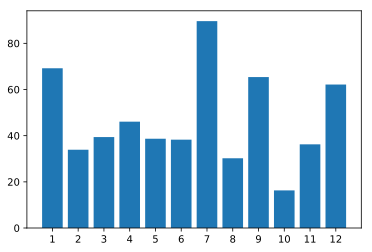

In [17]:
dfa = pd.read_csv(base_path+'2017年电影信息.csv',encoding = "gbk")
dfa = df_info[['mname','releaseday','boxoffice_tot']]
dfa.loc[: ,'releaseday'] = pd.to_datetime(dfa.releaseday)
dfa = dfa.set_index('releaseday')

boxoffices = np.array(dfa.resample('M').sum().values.tolist())
boxoffices = boxoffices/100000000

x = [str(i) for i in range(1,13)]
plt.bar(x, boxoffices.reshape(-1)[:-1])
plt.savefig('/mnt/c/Users/chenshuai/OneDrive/研究生笔记/竞赛/图书馆建模/img/month.png')
plt.show()

# 国内外票房对比

In [ ]:
dfa = pd.read_csv(base_path+'2017年电影信息.csv',encoding = "gbk")
dfa = df_info[['mname','region','boxoffice_tot']]
dfa.loc[: ,'releaseday'] = pd.to_datetime(dfa.releaseday)
dfa = dfa.set_index('releaseday')

boxoffices = np.array(dfa.resample('M').sum().values.tolist())
boxoffices = boxoffices/100000000

x = [str(i) for i in range(1,13)]
plt.bar(x, boxoffices.reshape(-1)[:-1])
plt.savefig('/mnt/c/Users/chenshuai/OneDrive/研究生笔记/竞赛/图书馆建模/img/month.png')
plt.show()

In [499]:
import matplotlib
matplotlib.matplotlib_fname() #将会获得matplotlib包所在文件夹

'/home/nocater/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc'